# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

In [4]:
tips = sns.load_dataset('tips')
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']
tips['tip_pct'] = tips['tip_pct']*100
tips.head()

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,6.320401
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,19.124424
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,19.988578
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,16.249386
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,17.206864


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           1.52e-06
Time:                        21:20:01   Log-Likelihood:                -1015.7
No. Observations:                 244   AIC:                             2035.
Df Residuals:                     242   BIC:                             2042.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.5297      2.319     13.166      0.0

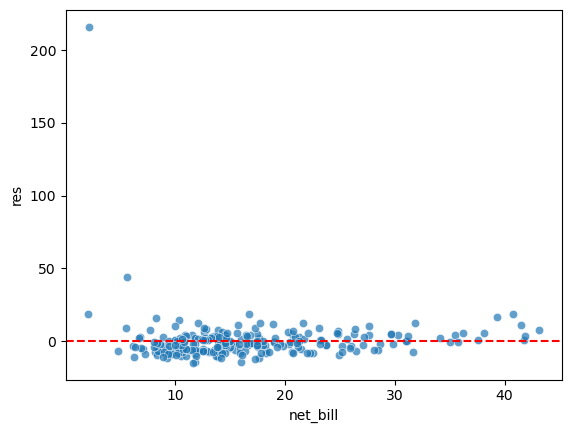

In [5]:
regr1 = smf.ols('tip_pct ~ net_bill', data=tips).fit()
print(regr1.summary())
tips['res'] = regr1.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .70)
plt.axhline(y=0, color='r', linestyle='--')

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           1.62e-13
Time:                        21:20:01   Log-Likelihood:                -999.85
No. Observations:                 244   AIC:                             2004.
Df Residuals:                     242   BIC:                             2011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           61.8083      5.401  

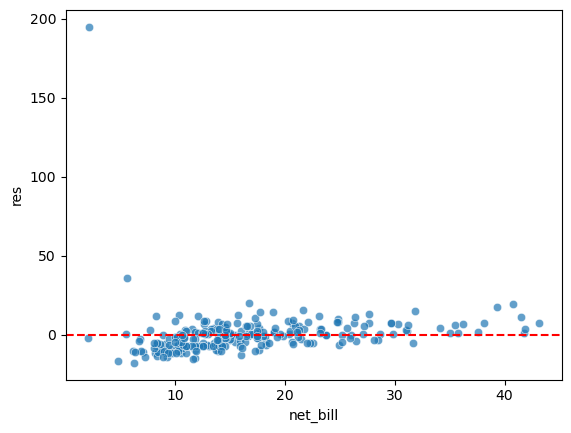

In [7]:
regr2 = smf.ols('tip_pct ~ np.log(net_bill)', data=tips).fit()
print(regr2.summary())
tips['res'] = regr2.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .70)
plt.axhline(y=0, color='r', linestyle='--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           1.06e-09
Time:                        21:20:02   Log-Likelihood:                -1006.4
No. Observations:                 244   AIC:                             2019.
Df Residuals:                     241   BIC:                             2029.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                48.51

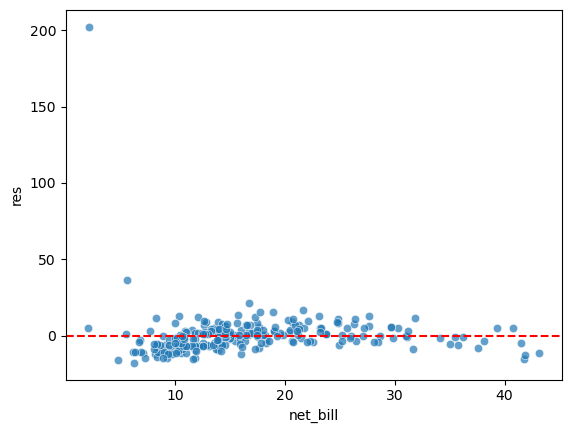

In [9]:
regr3 = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)', data=tips).fit()
print(regr3.summary())
tips['res'] = regr3.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .70)
plt.axhline(y=0, color='r', linestyle='--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           8.27e-16
Time:                        21:20:02   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3303      0.056     59.748      0.0

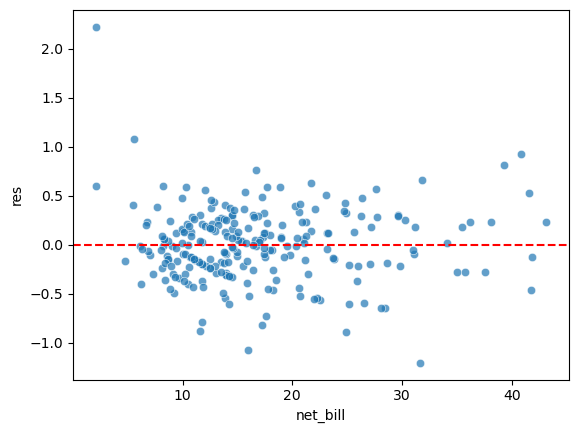

In [11]:
regr4 = smf.ols('np.log(tip_pct) ~ net_bill', data=tips).fit()
print(regr4.summary())
tips['res'] = regr4.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .70)
plt.axhline(y=0, color='r', linestyle='--')

In [12]:
tips['pred_tip_pct'] = np.exp(regr4.fittedvalues)

tips[['pred_tip_pct', 'tip_pct']].corr().iloc[0,1]**2

0.11440988592529767

In [13]:
regr4.rsquared

0.23534487140864302

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           5.20e-20
Time:                        21:20:02   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.2109      0.133  

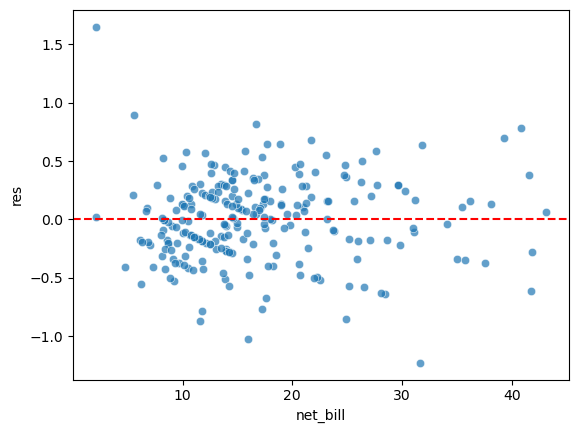

In [15]:
regr5 = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data=tips).fit()
print(regr5.summary())
tips['res'] = regr5.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .70)
plt.axhline(y=0, color='r', linestyle='--')

In [16]:
tips['pred_tip_pct'] = np.exp(regr5.fittedvalues)

tips[['pred_tip_pct', 'tip_pct']].corr().iloc[0,1]**2

0.308948747403223

In [17]:
regr5.rsquared

0.29347402150807766

###  6. qual modelo resultou no melhor ajuste?

O modelo que melhor se ajustou foi foi o ```regr5```, aplicando a função log tanto em ```tip_pct``` quanto em ```net_bill```. Em que o resíduo ficou sem um padrão evidente, e com o maior $R^2$ entre todos.

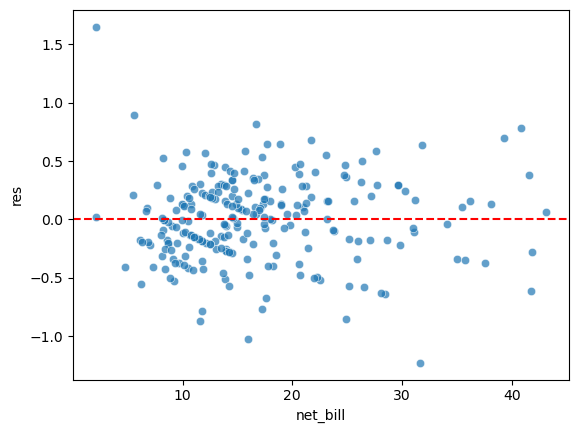

In [20]:
sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .70)
plt.axhline(y=0, color='r', linestyle='--')